In [48]:
from scipy.misc import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import colorsys
import numpy as np

from PIL import Image

%matplotlib inline

plt.rcParams['figure.figsize'] = (10., 10.)

In [95]:
def recreate_image(h, s, v, width, height):
    
    image = np.zeros((width, height, 3))
    index = 0
    for i in range(width):
        for j in range(height):
            image[j][i] = np.array((h[j][i], s[j][i], v[j][i]))
            index += 1
    return image

def recreate_band(codebook, labels, w, h):
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def quantize(band, num_colors):
    w, h = tuple(band.shape)
    
    flattened = np.reshape(band, (w * h, 1))
    kmeans = KMeans(n_clusters=num_colors, n_init=3, random_state=0).fit(flattened)
    labels = kmeans.predict(flattened)
    return recreate_band(kmeans.cluster_centers_, labels, w, h)

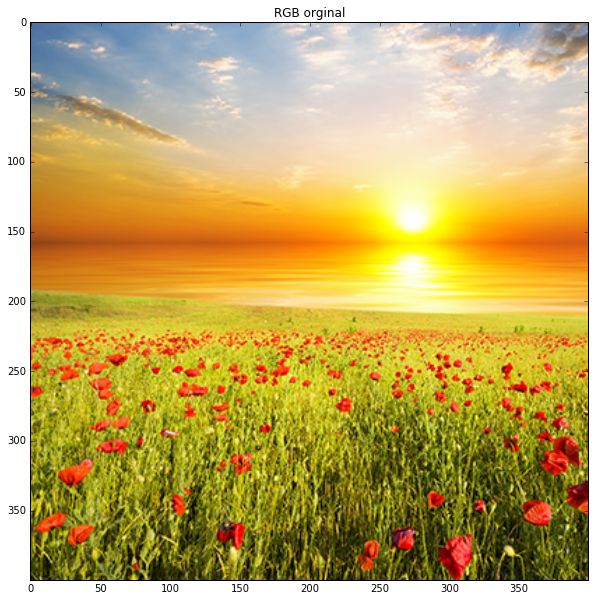

In [88]:
im_orig = Image.open("C:/users/alex/downloads/beautiful-day.jpg")

plt.imshow(im_orig)
plt.title("RGB orginal")

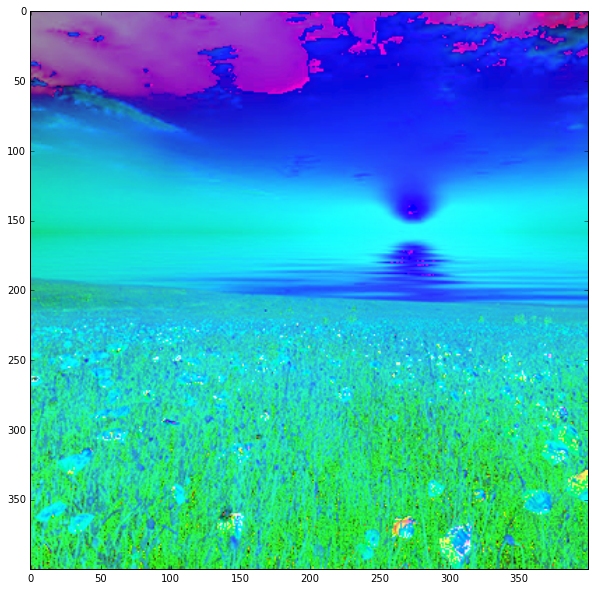

In [89]:
im = im_orig.convert('HSV')

im = np.asarray(im)

h = im[:,:,0] / 255
s = im[:,:,1] / 255
v = im[:,:,2] / 255

plt.imshow(im/255)

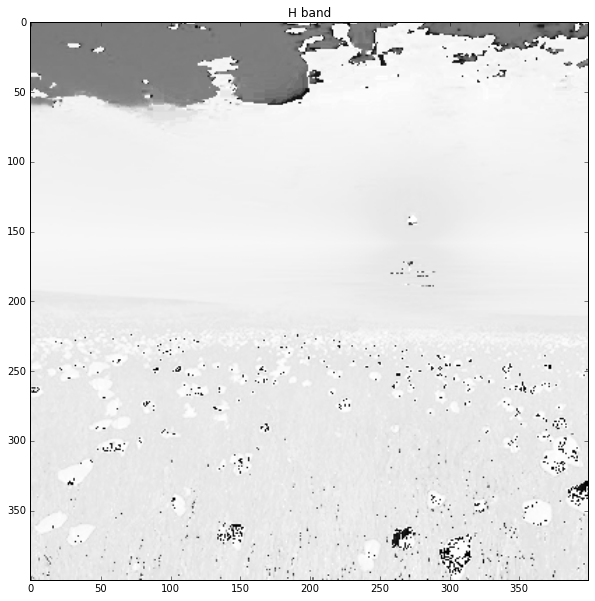

In [90]:
plt.imshow(h, cmap="Greys")
plt.title("H band")

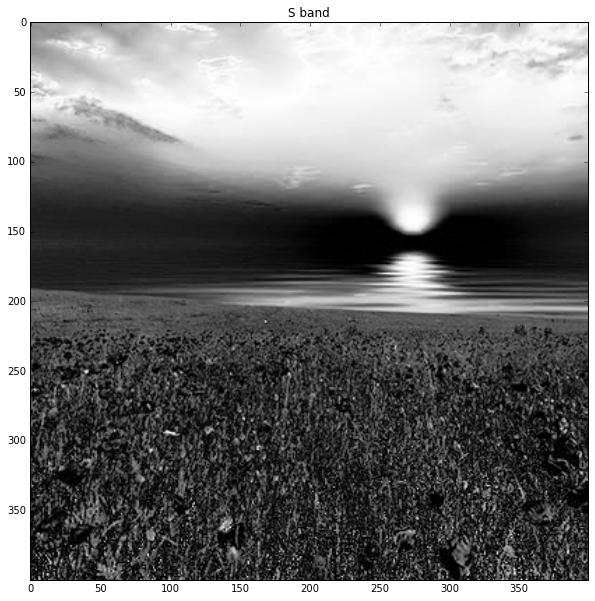

In [91]:
plt.imshow(s, cmap='Greys')
plt.title("S band")

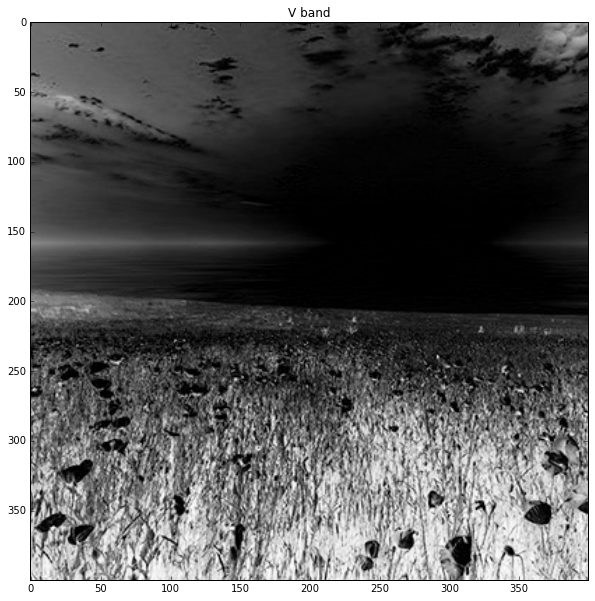

In [92]:
plt.imshow(v, cmap="Greys")
plt.title("V band")

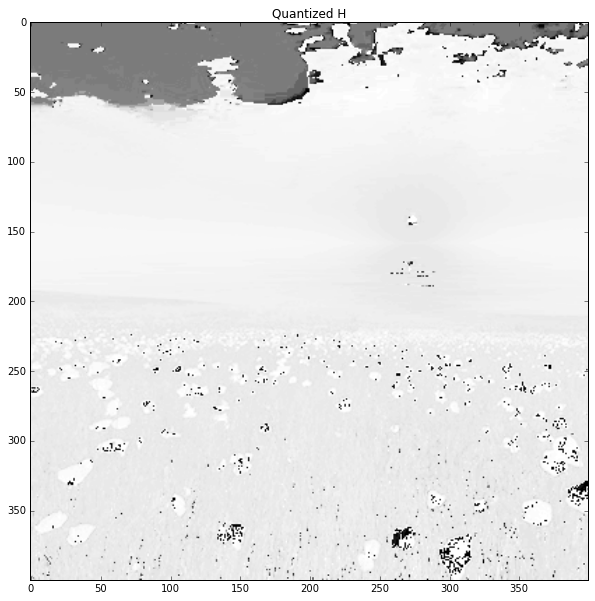

In [147]:
quant_h = quantize(h, 20)

plt.imshow(quant_h, cmap='Greys')
plt.title("Quantized H")

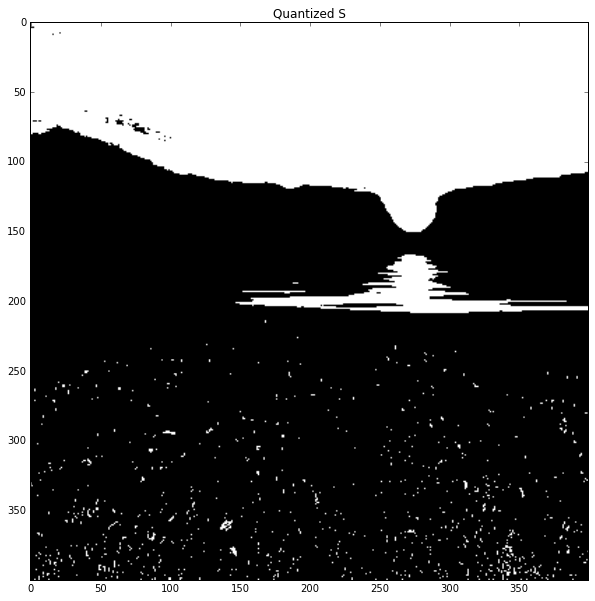

In [148]:
quant_s = quantize(s, 2)

plt.imshow(quant_s, cmap='Greys')
plt.title("Quantized S")

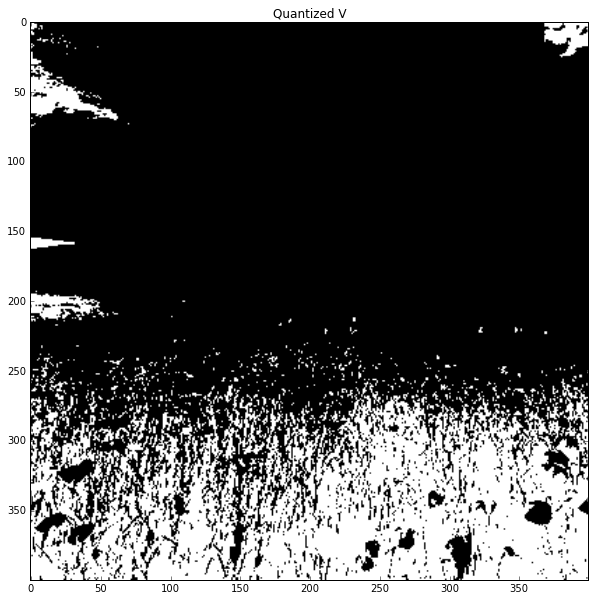

In [149]:
quant_v = quantize(v, 2)

plt.imshow(quant_v, cmap='Greys')
plt.title("Quantized V")

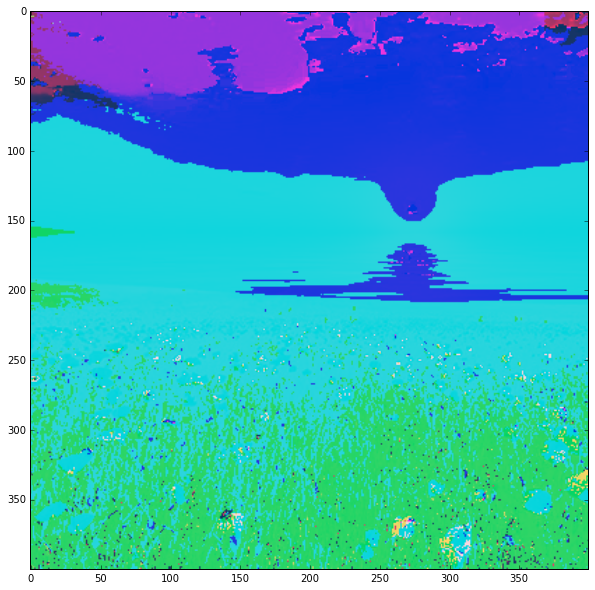

In [150]:
recombine = recreate_image(h, quant_s, quant_v, im.shape[1], im.shape[0])

plt.imshow(recombine)

('H', 'S', 'V')
False


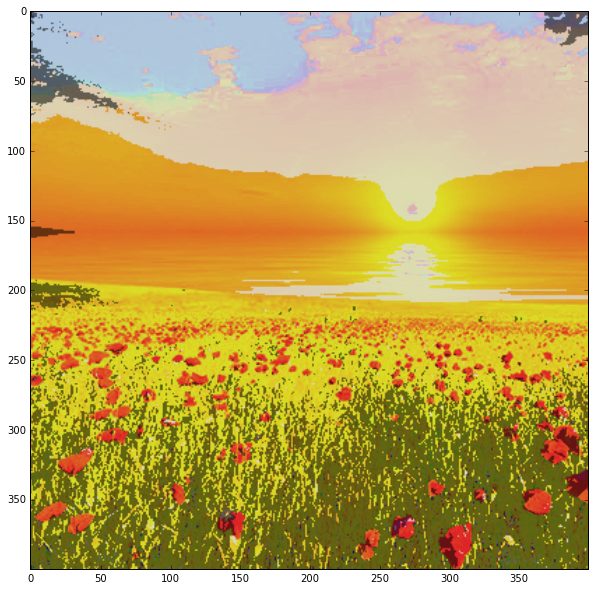

In [151]:
RGB_quantized = Image.fromarray(np.uint8(recombine*255), mode='HSV')
print(RGB_quantized.getbands())

RGB_quant = RGB_quantized.convert('RGB')

print(RGB_quantized == RGB_quant)
plt.imshow(RGB_quant)

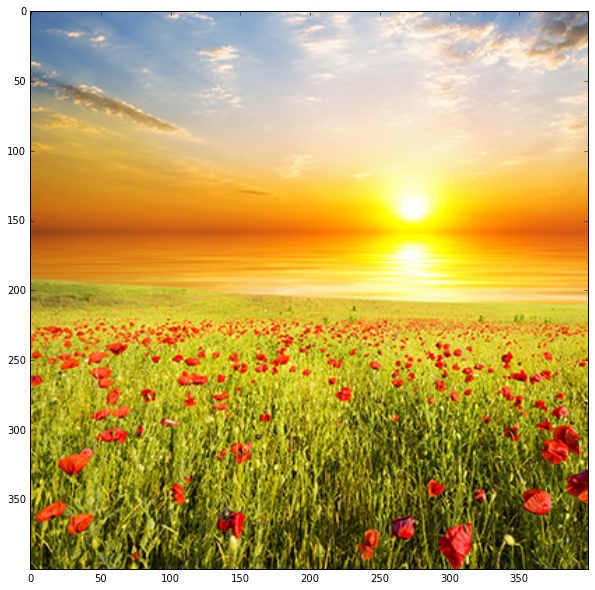

In [115]:
plt.imshow(im_orig)